## Data preprocessing for the "turbine" dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("datasets/A1-turbine.txt", sep="\t")

In [18]:
# Rename columns, so it's easier to refer to them in the code
df = df.rename(columns={"#height_over_sea_level": "height", "power_of_hydroelectrical_turbine": "power"})

In [19]:
df.mean()

height       611.873614
fall          77.147605
net_fall      76.487583
flow           5.921286
power       3868.492262
dtype: float64

In [20]:
# Get the standard deviation of each data column
np.sqrt(df.var())

height        11.088312
fall          10.745153
net_fall      11.070332
flow           1.782916
power       1399.998523
dtype: float64

#### The mean values of all of data columns are very different. Additionally, the mean standard deviation is not that big, for example, for ```height``` This means that for the neural network to properly get the differences in data, weights must be set very accurately. In order to avoid this problem, we decided to rescale all the data columns accordingly.

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'fall'}>],
       [<Axes: title={'center': 'net_fall'}>,
        <Axes: title={'center': 'flow'}>],
       [<Axes: title={'center': 'power'}>, <Axes: >]], dtype=object)

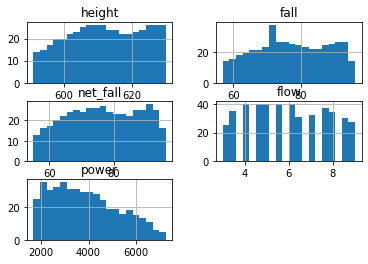

In [21]:
df.hist(bins=20)

Looking at the histograms above, we can see that none of the data is distributed in a way close to the normal one. ```height``` and ```net_fall``` values are close to it, but with tails being cut. For this reason we decided to use the normalization, not standartization for each column. As we can see, there are no negative values, so we will rescale all the columns to be in range 0..1. This should also help with the numeric stability of the network

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'fall'}>],
       [<Axes: title={'center': 'net_fall'}>,
        <Axes: title={'center': 'flow'}>],
       [<Axes: title={'center': 'power'}>, <Axes: >]], dtype=object)

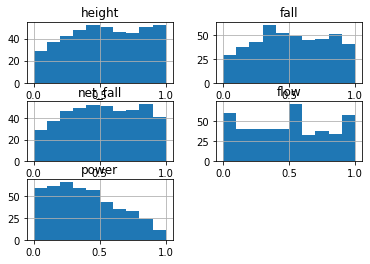

In [22]:
df = (df - df.min()) / (df.max() - df.min())
df.hist()

The data is clean otherwise, we cannot observe any outliers in any of single values, but maybe we can find some irregularities when looking on combination of different data columns. We were trying to see them, but the data looks pretty good already

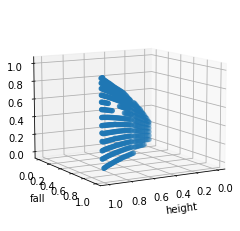

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df["height"], df["fall"], df["power"], marker='o')
plt.xlabel("height")
plt.ylabel("fall")
ax.view_init(elev=10., azim=60)

fall and net_fall correlation:  0.9978332718420375


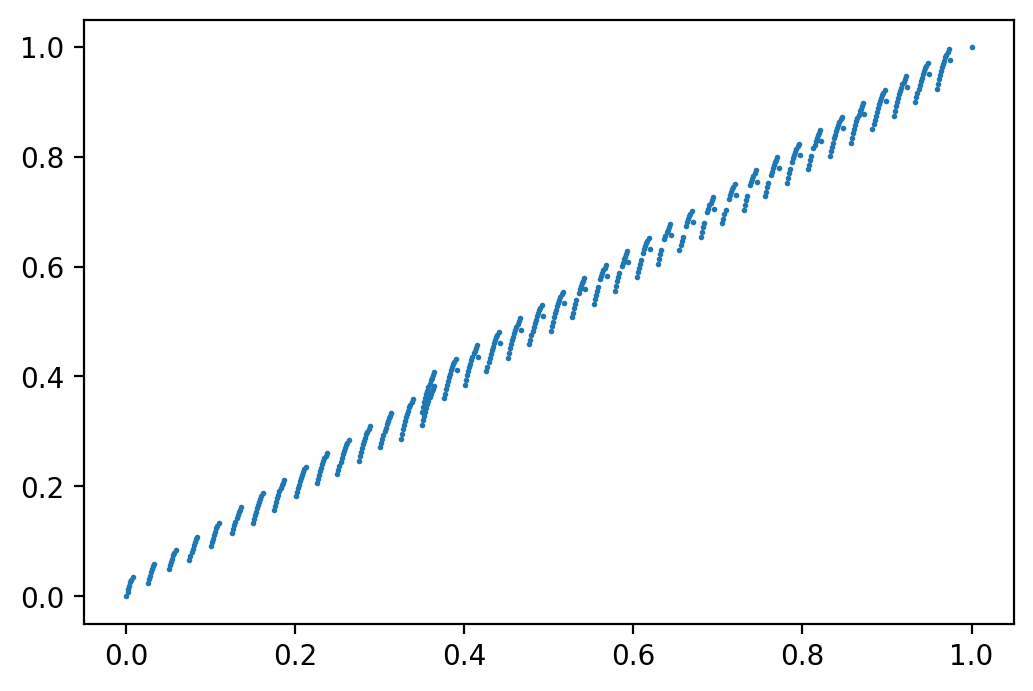

In [24]:
print("fall and net_fall correlation: ", np.corrcoef(df["fall"], df["net_fall"])[0, 1])
plt.figure(dpi=200)
plt.scatter(df["fall"], df["net_fall"], 1)
plt.show()

In [25]:
# Scale the output to be between 0.1 and 0.9 for a better performance when we have the sigmoid activation
df["power"] = df["power"] * 0.8 + 0.1
df.describe()

,height,fall,net_fall,flow,power
count,451.000000,451.000000,451.000000,451.000000,451.000000
mean,0.535221,0.516428,0.523289,0.486881,0.414107
std,0.284316,0.272581,0.271365,0.297153,0.200494
min,0.000000,0.000000,0.000000,0.000000,0.100000
25%,0.307692,0.306317,0.302427,0.250000,0.248295
50%,0.538462,0.508625,0.521510,0.500000,0.388422
75%,0.794872,0.757864,0.760816,0.750000,0.561995
max,1.000000,1.000000,1.000000,1.000000,0.900000


As we can see above, ```fall``` and ```net_fall``` have a huge correlation coefficient. This could mean that we can remove one of these columns from our data. But looking closer, it's clear that the relation here is far from linear, and the model can learn something from these differences, so we keep all the initial values.

That's it, we have all the needed values, no outliers, and the data looks fine. Let's store it now


In [26]:
df.to_csv("processed_datasets/turbine.csv", index=False)